# データマイニング最終課題

## アワビの性別データセットをK-NNで実装

### データセットヘッダー

-----------------------------
Sex / nominal / -- / M=0, F=1, and I=2 (infant)<br>
Length / continuous / mm / Longest shell measurement<br>
Diameter / continuous / mm / perpendicular to length<br>
Height / continuous / mm / with meat in shell<br>
WholeWeight / continuous / grams / whole abalone<br>
ShuckedWeight / continuous / grams / weight of meat<br>
VisceraWeight / continuous / grams / gut weight (after bleeding)<br>
ShellWeight / continuous / grams / after being dried<br>
Rings / integer / -- / +1.5 gives the age in years<br>

In [150]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [151]:
init_df = pd.read_csv('data/abalone.data')
init_df

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [152]:
init_df.values.tolist()

[[0.0, 0.455, 0.365, 0.095, 0.514, 0.2245, 0.101, 0.15, 15.0],
 [0.0, 0.35, 0.265, 0.09, 0.2255, 0.0995, 0.0485, 0.07, 7.0],
 [1.0, 0.53, 0.42, 0.135, 0.677, 0.2565, 0.1415, 0.21, 9.0],
 [0.0, 0.44, 0.365, 0.125, 0.516, 0.2155, 0.114, 0.155, 10.0],
 [2.0, 0.33, 0.255, 0.08, 0.205, 0.0895, 0.0395, 0.055, 7.0],
 [2.0, 0.425, 0.3, 0.095, 0.3515, 0.141, 0.0775, 0.12, 8.0],
 [1.0, 0.53, 0.415, 0.15, 0.7775, 0.237, 0.1415, 0.33, 20.0],
 [1.0, 0.545, 0.425, 0.125, 0.768, 0.294, 0.1495, 0.26, 16.0],
 [0.0, 0.475, 0.37, 0.125, 0.5095, 0.2165, 0.1125, 0.165, 9.0],
 [1.0, 0.55, 0.44, 0.15, 0.8945, 0.3145, 0.151, 0.32, 19.0],
 [1.0, 0.525, 0.38, 0.14, 0.6065, 0.194, 0.1475, 0.21, 14.0],
 [0.0, 0.43, 0.35, 0.11, 0.406, 0.1675, 0.081, 0.135, 10.0],
 [0.0, 0.49, 0.38, 0.135, 0.5415, 0.2175, 0.095, 0.19, 11.0],
 [1.0, 0.535, 0.405, 0.145, 0.6845, 0.2725, 0.171, 0.205, 10.0],
 [1.0, 0.47, 0.355, 0.1, 0.4755, 0.1675, 0.0805, 0.185, 10.0],
 [0.0, 0.5, 0.4, 0.13, 0.6645, 0.258, 0.133, 0.24, 12.0],
 [2.0, 

In [153]:
init_df['Sex']

0       0
1       0
2       1
3       0
4       2
       ..
4172    1
4173    0
4174    0
4175    1
4176    0
Name: Sex, Length: 4177, dtype: int64

In [154]:
# アワビデータセットをdataframeで読み込む
abalone_target_data = pd.DataFrame(init_df, columns=['Sex'])
iris_df = pd.DataFrame(init_df.values.tolist(), columns=init_df.columns)

X_train, X_test, Y_train, Y_test = train_test_split(iris_df, abalone_target_data, test_size=0.1, train_size=0.9)

In [155]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train, Y_train)

/Users/yuuiri/PycharmProjects/college/venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=6)

In [156]:
Y_pred = knn_model.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred))

1.0


/Users/yuuiri/PycharmProjects/college/venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yuuiri/PycharmProjects/college/venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yuuiri/PycharmProjects/college/venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yuuiri/PycharmProjects/college/venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConv

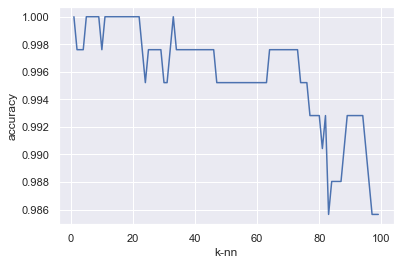

In [157]:
accuracy_list = []
sns.set()
k_range = range(1, 100)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy_list.append(metrics.accuracy_score(Y_test, Y_pred))

figure = plt.figure()
ax = figure.add_subplot(111)
ax.plot(k_range, accuracy_list)
ax.set_xlabel('k-nn')
ax.set_ylabel('accuracy')
plt.show()
